# Classification example

## Import Data

In [50]:
# Import the Libraries
import pandas as pd
import sklearn as skl 
import sklearn.datasets as dts
import matplotlib.pyplot as plt
# Import the required machine learning libraries from Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [10]:
# Load the Iris Data Set
iris = dts.load_iris()

In [13]:
# Print a basic description of the data set
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [19]:
# Load the data into a DataFrame and select the target variable
dataset = pd.DataFrame(iris['data'], columns=iris['feature_names'])
dataset['target'] = iris['target']

In [26]:
ourdataset = pd.DataFrame(iris['data'], columns=iris['feature_names'])
ourdataset['target'] = iris['target']
ourdataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Clean Data

In [34]:
# The data is already clean!
dataset['sepal length (cm)'].isna().sum()

0

In [35]:
dataset.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

## Explore Data

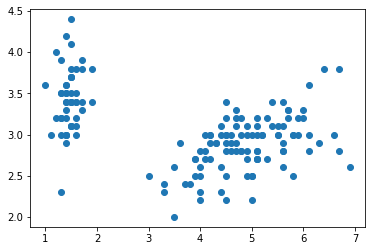

In [46]:
plt.scatter(dataset['petal length (cm)'],dataset['sepal width (cm)'])

<AxesSubplot:ylabel='Density'>

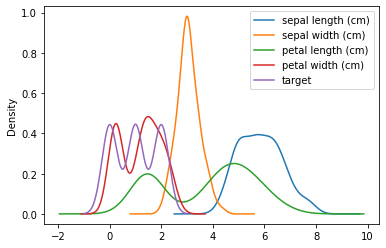

In [49]:
dataset.plot(kind='density')

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

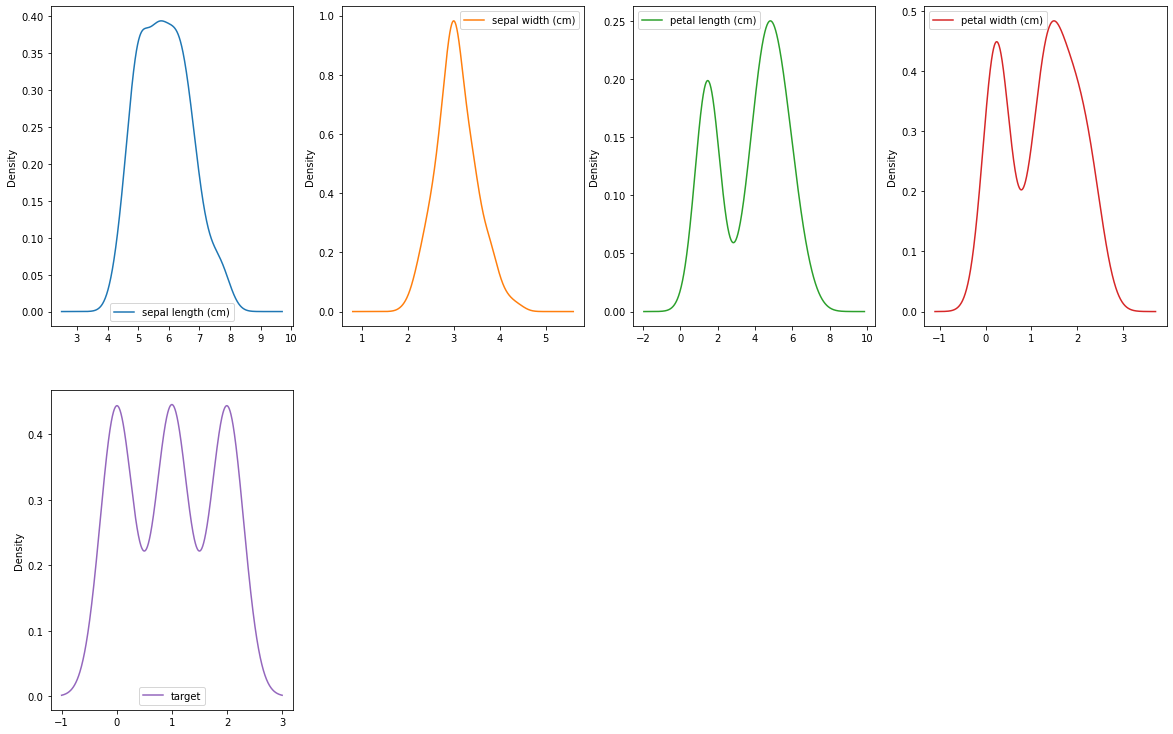

In [39]:
# Create density plots for each variable
dataset.plot(kind="density", subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(20,20))

No handles with labels found to put in legend.


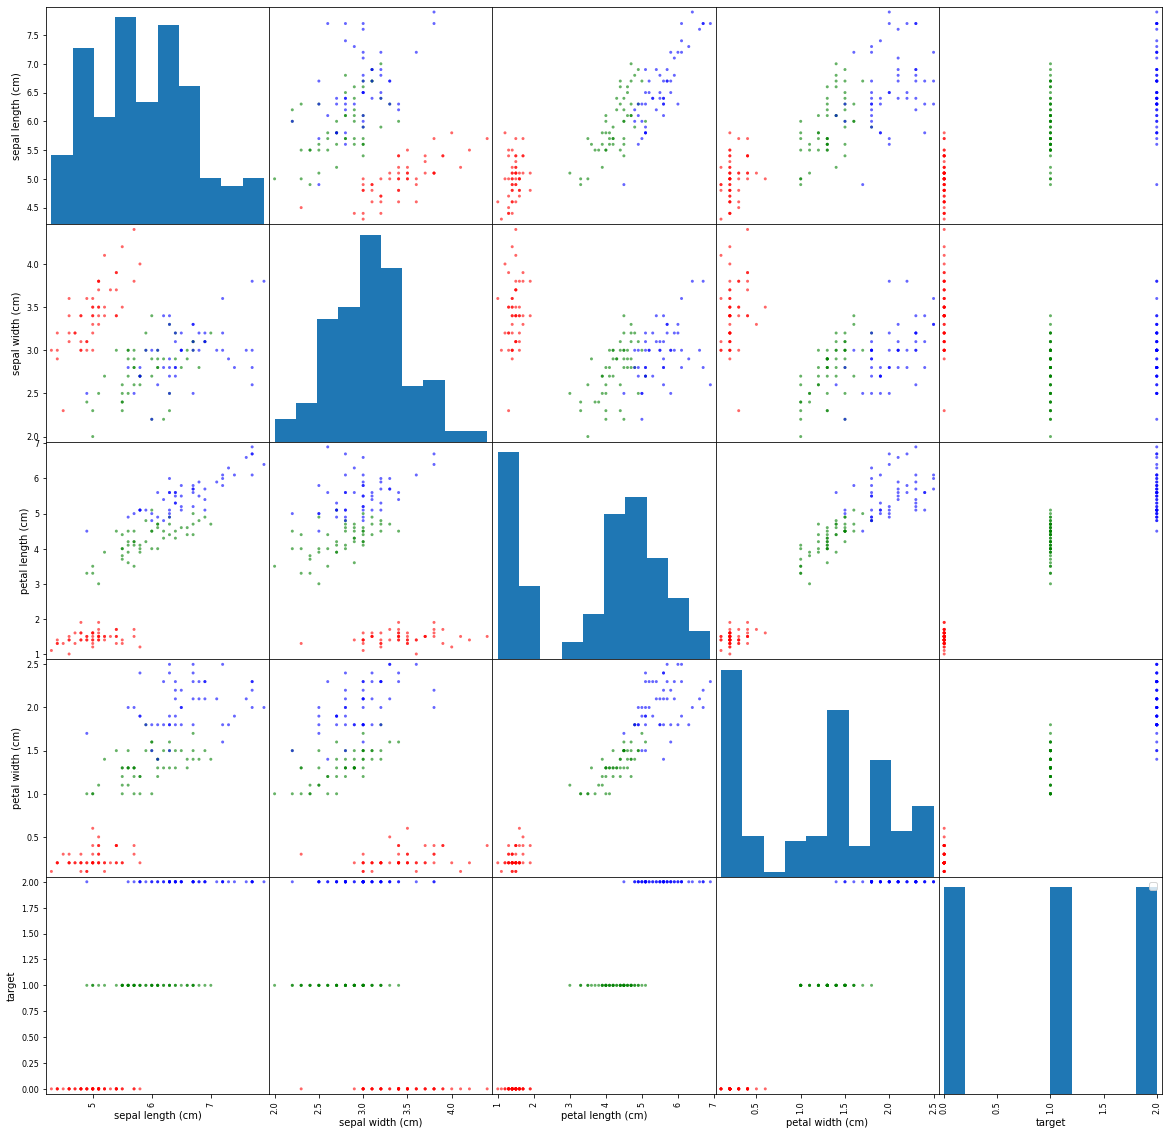

In [9]:
# What are the correlations between the variables? Create a Scatter Matrix
color_palette = {0: "red", 1: "green", 2: "blue"}
colors = [color_palette[c] for c in dataset['target']]
pd.plotting.scatter_matrix(dataset, alpha=0.6, figsize=(20, 20), diagonal='hist', c=colors)
plt.legend()
plt.show()

## Split Data

In [54]:
# Look at the colums of the data set
dataset.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [53]:
# Choose columns for training and specific the target
X=dataset[[dataset.columns[1], dataset.columns[2]]] # 1. set the col to our preferences!!! 2. Add more features
y=dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Model training

In [45]:
# Use the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier # 3. change other training models

# Create a decision tree model with a depth of '2'
model = DecisionTreeClassifier(max_depth=3)

# Train the model using the training sets
model.fit(X_train, y_train)

## Test and Evaluate

In [48]:
# Test and evaluate the metrics
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions using the testing set
y_predictions = model.predict(X_test)

# Metrics
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predictions))

print('\nClassification Report')
print(classification_report(y_test, y_predictions))

## Show results

In [19]:
# Use numpy and matplotlib
import numpy as np
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


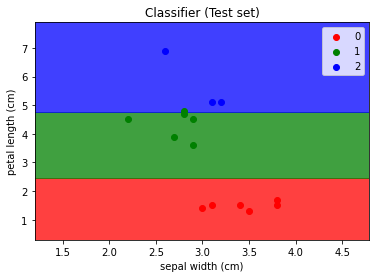

In [20]:
# Visualising the Test set results
X_set, y_set = X_test.values, y_test.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('sepal width (cm)')
plt.ylabel('petal length (cm)')
plt.legend()
plt.show()

## Exercise

1. Can you improve your score if you use more than two feature?
2. How would you implement crossvalidation? are we overfitting? search and try.
3. Can you use another model for this classification? try another one.

# Question 1

### Yes, add more features to achieve a better accuracy.

In [86]:
dataset.columns


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [59]:
# Try to improve score with more than 2 features
X=dataset[[dataset.columns[0],dataset.columns[1], dataset.columns[2],dataset.columns[3]]]
y=dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [96]:
# Create a decision tree model with a depth of '2'
model = DecisionTreeClassifier(max_depth=3)

# Train the model using the training sets
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [97]:
# Test and evaluate the metrics
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions using the testing set
y_predictions = model.predict(X_test)

# Metrics
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predictions))

print('\nClassification Report')
print(classification_report(y_test, y_predictions))

Confusion Matrix
[[6 0 0]
 [0 5 1]
 [0 0 3]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.83      0.91         6
           2       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.92      0.94      0.92        15
weighted avg       0.95      0.93      0.94        15



# Question 2
### Answer 2: No overfitting observed.

In [93]:
from sklearn.linear_model import LogisticRegression
X=dataset[[dataset.columns[2], dataset.columns[3]]]
y=dataset['target']
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.         1.         0.86666667 0.93333333 0.83333333]
Average Cross Validation score :0.9266666666666665


# Question 3
### Answer 3: Yes, a decision tree model is better than K-neighboring model.

In [74]:
# Use the K-Neighboring Classifier
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.7, random_state=42)
nca = NeighborhoodComponentsAnalysis(random_state=42)


# Create a K-neighbor model with a depth of '3'
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])

# Train the model using the training sets
nca_pipe.fit(X_train, y_train)

print(nca_pipe.score(X_test, y_test))

0.9619047619047619
